In [1]:
import pandas as pd

# --- Build the datasets --- #
%run -n ./HW4-datasets.ipynb
    
# --- Load the datasets --- #
ras_df = pd.read_csv('Patterned_Arithmetic_Sequences.csv')
ks_df = pd.read_csv('Patterned_Key_Sequences.csv')

Datasets saved as 'Arithmetic_Sequences.csv' and 'Key_Sequences.csv'.


In [6]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# --- Normalize the Reverse Arithmetic Sequences --- #
scaler = MinMaxScaler()
ras_scaled_df = pd.DataFrame(scaler.fit_transform(ras_df.values), columns=ras_df.columns)

# --- OneHotEncode the Key Sequences --- #
enc = OneHotEncoder(sparse_output=False, dtype=int)
arr = enc.fit_transform(ks_df)
ks_encoded_df = pd.DataFrame(arr, columns=enc.get_feature_names_out(ks_df.columns))

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# --- Build supervised sequence tensors --- #
def build_xy(df):
    data = df.values.astype(float)
    X = data[:, :-1]
    y = data[:, -1:]
    X = X[..., None]
    y = y[..., None]
    return X, y

ras_X, ras_y = build_xy(ras_scaled_df)
ks_X, ks_y = build_xy(ks_encoded_df)

# --- Partition into train, validation, test --- #
def split_block(X, y):
    X_tmp, X_test, y_tmp, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_tmp, y_tmp, test_size=0.125, shuffle=False
    )
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)
    
ras_train, ras_val, ras_test = split_block(ras_X, ras_y)
ks_train,  ks_val,  ks_test  = split_block(ks_X, ks_y)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# --- Build the RNN model --- #
model = Sequential([
    Input(shape=(ras_train[0].shape[1], ras_train[0].shape[2])),
    SimpleRNN(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

history_ras = model.fit(
    ras_train[0], ras_train[1],
    validation_data=(ras_val[0], ras_val[1]),
    epochs=50,
    verbose=1
)

test_loss_ras = model.evaluate(ras_test[0], ras_test[1])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.2448 - val_loss: 0.1643
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1938 - val_loss: 0.1282
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1528 - val_loss: 0.0958
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1139 - val_loss: 0.0662
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0774 - val_loss: 0.0392
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0445 - val_loss: 0.0165
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0182 - val_loss: 0.0040
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0048 - val_loss: 0.0057
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0070 - val_loss: 0.0114
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - val_loss: 0.0068
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019 - val_loss: 0.0018
E

In [9]:
model_k = Sequential([
    Input(shape=(ras_train[0].shape[1], ras_train[0].shape[2])),
    SimpleRNN(50, activation='relu'),
    Dense(ks_train[1].shape[2])
])
model_k.compile(optimizer='adam', loss='categorical_crossentropy')

history_ks = model_k.fit(
    ks_train[0], ks_train[1],
    validation_data=(ks_val[0], ks_val[1]),
    epochs=50,
    verbose=1
)

test_loss_ks = model_k.evaluate(ks_test[0], ks_test[1])

Epoch 1/50


/Users/maddox/progz/CS-583/.venv/lib/python3.13/site-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 8.5150e-09 - val_loss: 1.1921e-08
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.5150e-09 - val_loss: 1.1921e-08
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5150e-09 - val_loss: 1.1921e-08
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5150e-09 - val_loss: 1.1921e-08
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.5149e-09 - val_loss: 1.1921e-08
Epoch 1

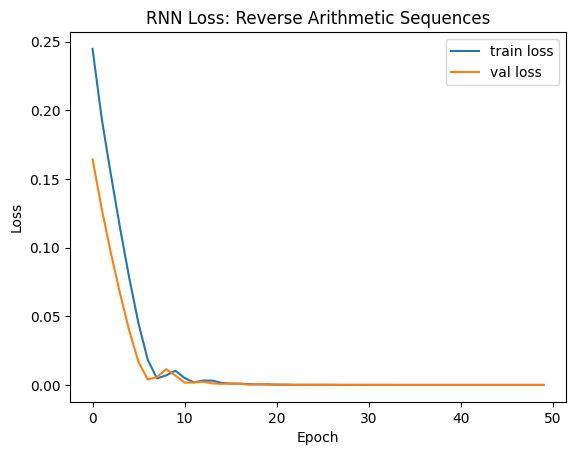

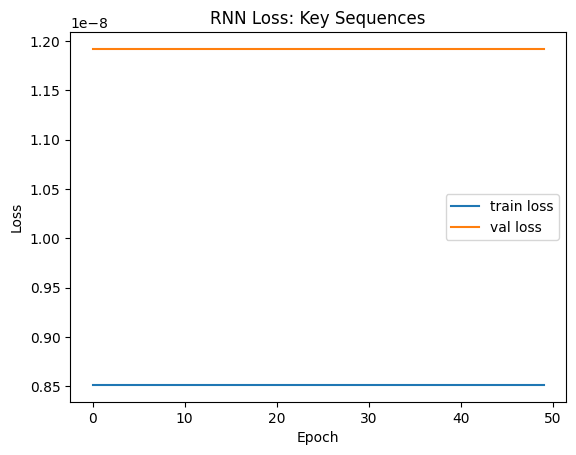

In [10]:
import matplotlib.pyplot as plt

# --- RNN Loss of Reverse Arithmetic Sequences --- #
plt.plot(history_ras.history['loss'], label='train loss')
plt.plot(history_ras.history['val_loss'], label='val loss')
plt.title('RNN Loss: Reverse Arithmetic Sequences')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- RNN loss of Key Sequences --- #
plt.plot(history_ks.history['loss'], label='train loss')
plt.plot(history_ks.history['val_loss'], label='val loss')
plt.title('RNN Loss: Key Sequences')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
p = model.predict(ras_test[0]).reshape(-1, 1)
t = ras_test[1].reshape(-1, 1)

idx = 0
sc = MinMaxScaler()
sc.min_ = scaler.min_[idx]
sc.scale_ = scaler.scale_[idx]

p_raw = sc.inverse_transform(p)
t_raw = sc.inverse_transform(t)

p = model_k.predict(ks_test[0])
t = ks_test[1].reshape(ks_test[1].shape[0], ks_test[1].shape[2])

p_idx = p.argmax(axis=1)
t_idx = t.argmax(axis=1)
print(p_idx[:10], t_idx[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
